# Task-02

<i>Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.</i>

# About Dataset

## Description

The Titanic dataset provides detailed information about the passengers on the Titanic. It includes features such as passenger names, ages, genders, ticket classes, fares, cabin numbers, and whether they survived the sinking. This data is commonly used for exploratory data analysis, particularly to understand factors influencing survival rates.

## Importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Reading the dataset

In [4]:
titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Information about the dataframe

In [7]:
titanic.shape

(891, 12)

In [9]:
print(titanic['Embarked'].unique())


['S' 'C' 'Q' nan]


In [11]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [15]:
titanic.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Checking for null/missing values in the dataset

In [18]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Dropping unnecessary columns

In [21]:
titanic.drop(columns="Cabin",axis=1,inplace=True)

### Filling the missing values of the age column by Mean value of the column

In [24]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

### Drop the missing values of the Embarked column


In [27]:
titanic = titanic.dropna(subset=['Embarked'])
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [29]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Visualization

<Axes: ylabel='count'>

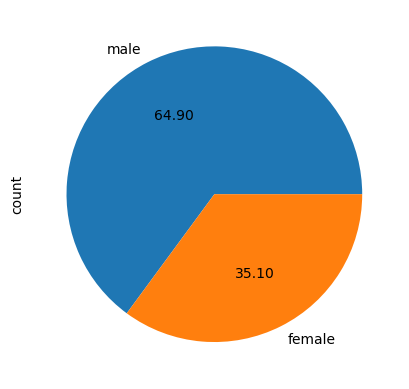

In [32]:
titanic['Sex'].value_counts().plot(kind='pie', autopct='%.2f')

## Visualization of people survived from different passenger class

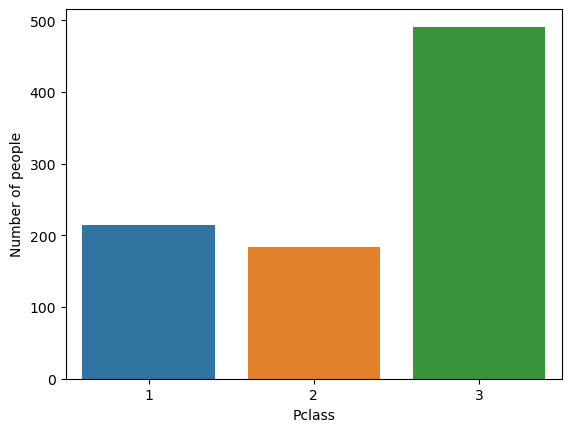

In [35]:
sns.countplot(x='Pclass',data=titanic)
plt.xlabel("Pclass")
plt.ylabel("Number of people")
plt.show()

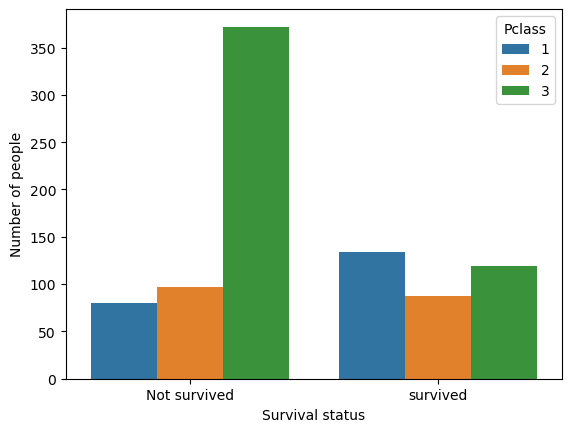

In [37]:
sns.countplot(x='Survived',hue='Pclass',data=titanic)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

## Visualizing the population of male and female passenger

<Axes: xlabel='Sex'>

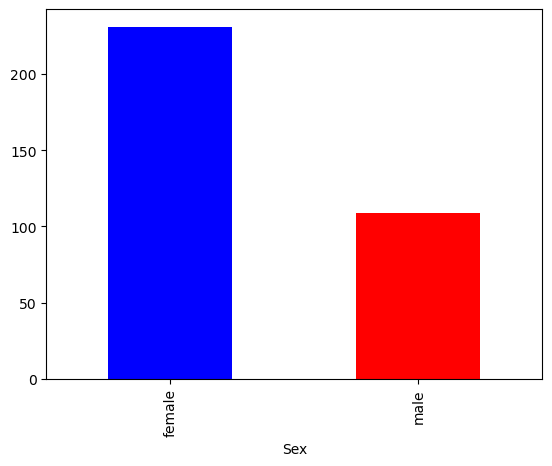

In [40]:
survivors = titanic[titanic['Survived']==1]
survivor_counts = survivors['Sex'].value_counts()
survivor_counts.plot(kind='bar', color=['blue', 'red'])

In [42]:
crosstab = pd.crosstab(survivors['Sex'], survivors['Pclass'], margins=True)
print("\nSurvivors by gender and class:")
print(crosstab)


Survivors by gender and class:
Pclass    1   2    3  All
Sex                      
female   89  70   72  231
male     45  17   47  109
All     134  87  119  340


#Both female and male passengers had higher survival rates in first class. 
#This suggests that first-class passengers had better access to lifeboats and safety measures.

## Distribution of age

(array([ 54.,  46., 177., 346., 117.,  70.,  45.,  23.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

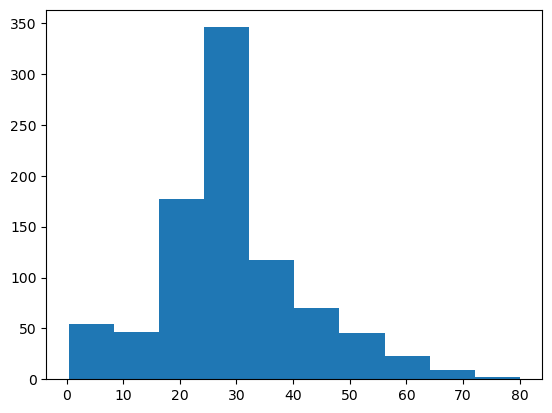

In [46]:
#For Continous data here we use Histogram for analysis
plt.hist(titanic['Age'])

C:\Users\welcome\AppData\Local\Temp\ipykernel_7128\3677708691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic['Age'])
C:\Users\welcome\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

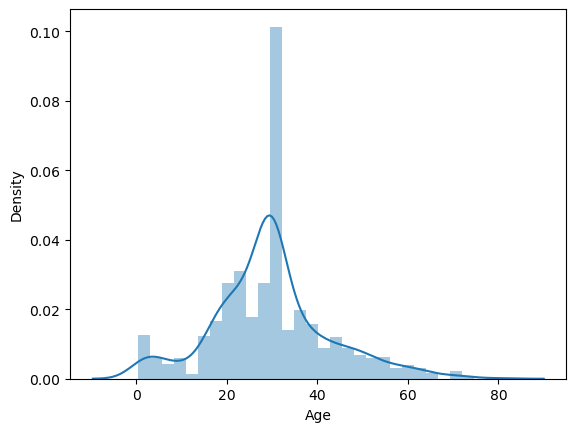

In [47]:
sns.distplot(titanic['Age'])

<Axes: >

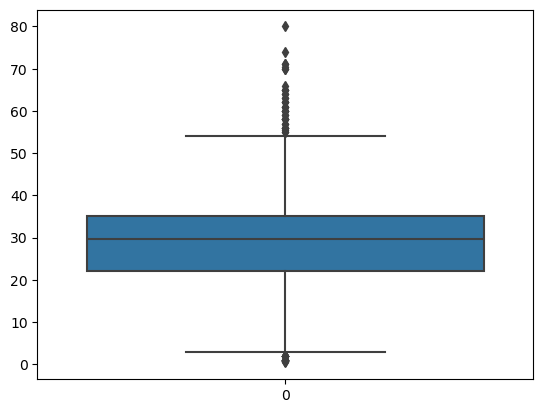

In [48]:
sns.boxplot(titanic['Age'])

C:\Users\welcome\AppData\Local\Temp\ipykernel_7128\2380807679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=bins)
C:\Users\welcome\AppData\Local\Temp\ipykernel_7128\2380807679.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age = titanic.groupby('AgeGroup')['Survived'].mean().reset_index()
C:\Users\welcome\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass 

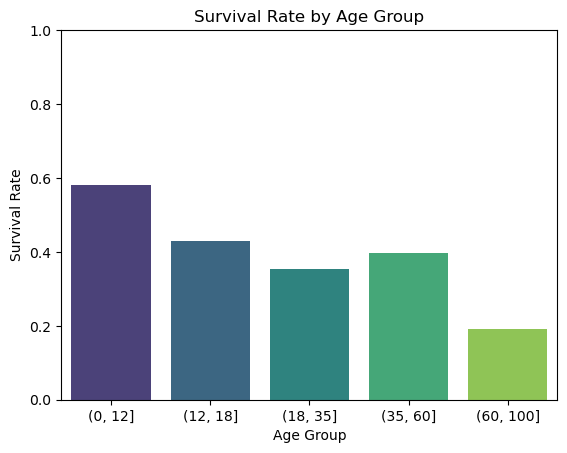

In [52]:
# Create Age Groups
bins = [0, 12, 18, 35, 60, 100]
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=bins)

# Calculate Survival Rates by Age Group
survival_rate_by_age = titanic.groupby('AgeGroup')['Survived'].mean().reset_index()

# Plot the Data
sns.barplot(data=survival_rate_by_age, x='AgeGroup', y='Survived', palette='viridis')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)  # Set y-axis limits to range from 0 to 1
plt.show()


## Changing the Sex column and Embarked column from categorical to numerical for model training

In [55]:
labelencoder = LabelEncoder()
titanic['Sex'] = labelencoder.fit_transform(titanic['Sex'])

C:\Users\welcome\AppData\Local\Temp\ipykernel_7128\2924481302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Sex'] = labelencoder.fit_transform(titanic['Sex'])


In [57]:
titanic.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

C:\Users\welcome\AppData\Local\Temp\ipykernel_7128\299619108.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
C:\Users\welcome\AppData\Local\Temp\ipykernel_7128\299619108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


In [59]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,"(18, 35]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,"(35, 60]"
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,"(18, 35]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,"(18, 35]"
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,"(18, 35]"


# Model Prediction

In [62]:
titanic_num = titanic[['Fare','Parch','SibSp','Age','Sex','Pclass','Embarked','Survived']]

In [64]:
titanic_num

,Fare,Parch,SibSp,Age,Sex,Pclass,Embarked,Survived
0,7.2500,0,1,22.000000,1,3,0,0
1,71.2833,0,1,38.000000,0,1,1,1
2,7.9250,0,0,26.000000,0,3,0,1
3,53.1000,0,1,35.000000,0,1,0,1
4,8.0500,0,0,35.000000,1,3,0,0
...,...,...,...,...,...,...,...,...
886,13.0000,0,0,27.000000,1,2,0,0
887,30.0000,0,0,19.000000,0,1,0,1
888,23.4500,2,1,29.699118,0,3,0,0
889,30.0000,0,0,26.000000,1,1,1,1


In [66]:
x = titanic_num.drop(columns=(['Parch','SibSp','Survived']))

In [68]:
x

,Fare,Age,Sex,Pclass,Embarked
0,7.2500,22.000000,1,3,0
1,71.2833,38.000000,0,1,1
2,7.9250,26.000000,0,3,0
3,53.1000,35.000000,0,1,0
4,8.0500,35.000000,1,3,0
...,...,...,...,...,...
886,13.0000,27.000000,1,2,0
887,30.0000,19.000000,0,1,0
888,23.4500,29.699118,0,3,0
889,30.0000,26.000000,1,1,1


In [70]:
# Target
y = titanic['Survived']

In [72]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [74]:
model = LogisticRegression()

In [76]:
model.fit(x_train,y_train)

LogisticRegression()

In [78]:
x_train_prediction=model.predict(x_train)

In [80]:
train_data_accuracy=accuracy_score(y_train,x_train_prediction)

In [82]:
print("Accuracy Score of training data: ",train_data_accuracy)

Accuracy Score of training data:  0.7974683544303798


In [84]:
x_test_prediction=model.predict(x_test)

In [86]:
test_data_accuracy=accuracy_score(y_test,x_test_prediction)

In [88]:
print("Accuracy score of testing data:",test_data_accuracy)

Accuracy score of testing data: 0.797752808988764
